# Assignment 1: Data Parsing, Cleansing and Integration
## Task 1 and 2
#### Student Name: Ziqing Yan
#### Student ID: s3749857

Date: 22 August 2021

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used:
* pandas
* re
* numpy
* xml.etree.ElementTree
* datetime
* matplotlib.pyplot

## Introduction

The goal of this assessment is to parse the xml file and clean it. There were a lot of problems in this dataset, such as outliers, missing values and so on. Sometimes I replace them with the proper value. Sometime I just simply delete them. The error information is also recorded. The details of how I handle them is showed below.

## Importing libraries 

In [1]:
# Code to import libraries as you need in this assessment, e.g.,
import pandas as pd
import numpy as np
import xml.etree.ElementTree as etree
from datetime import datetime
import re
import matplotlib.pyplot as plt

## Task 1. Parsing Data

### 1.1. Examining and loading data

After checking the xml file, I find that `JobAds` is the root tag and its child tag is `Source`. In each `Source`, there is one `SourceName` and many `Advertisement`. Each `Advertiesement` has an attribute `ID` and child tags `Title`, `Location`, `Company`, `ContractType`, `ContractTime`, `Category`, `Salary`, `OpenDate` and `CloseDate`. First of all, let's load the xml file.

In [2]:
# Load the xml file
tree = etree.parse("./S3749857_dataset1.xml")

### 1.2 Parsing data into the required format

To parse the data into a Pandas dataframe, we first need to initialize a dictionary.

In [3]:
# Initialize a dictionary with require keys
dataDict = {}
dataDict['Id'] = []
dataDict['Title'] = []
dataDict['Location'] = []
dataDict['Company'] = []
dataDict['ContractType'] = []
dataDict['ContractTime'] = []
dataDict['Category'] = []
dataDict['Salary'] = []
dataDict['OpenDate'] = []
dataDict['CloseDate'] = []
dataDict['SourceName'] = []

Next, I traverse the xml tree and extract the data into each column.

In [4]:
for source in tree.findall('Source'): # Traverse all <Source> tags
    for elem in source.findall('Advertisement'): # Traverse all <Advertisement> tags in each <Source> tag
        # Advertisements have the same source name when they are the children of the same source, so the code for SourceName is 
        # writen in the inner loop.
        # If <Source> doesn't have <SourceName>, assign NaN value to it
        dataDict['SourceName'].append(source.findall('SourceName')[0].text if source.findall('SourceName') != [] else np.nan)
        # If <Advertisement> doesn't have the attrib 'ID', assign NaN value to it
        dataDict['Id'].append(elem.attrib['ID'] if 'ID' in elem.attrib.keys() else np.nan)
        # If <Advertisement> doesn't have <Title>, assign NaN value to it
        dataDict['Title'].append(elem.findall('Title')[0].text if elem.findall('Title') != [] else np.nan)
        # The following operation is similar to what was done above
        dataDict['Location'].append(elem.findall('Location')[0].text if elem.findall('Location') != [] else np.nan)
        dataDict['Company'].append(elem.findall('Company')[0].text if elem.findall('Company') != [] else np.nan)
        dataDict['ContractType'].append(elem.findall('ContractType')[0].text if elem.findall('ContractType') != [] else np.nan)
        dataDict['ContractTime'].append(elem.findall('ContractTime')[0].text if elem.findall('ContractTime') != [] else np.nan)
        dataDict['Category'].append(elem.findall('Category')[0].text if elem.findall('Category') != [] else np.nan)
        dataDict['Salary'].append(elem.findall('Salary')[0].text if elem.findall('Salary') != [] else np.nan)
        dataDict['OpenDate'].append(elem.findall('OpenDate')[0].text if elem.findall('OpenDate') != [] else np.nan)
        dataDict['CloseDate'].append(elem.findall('CloseDate')[0].text if elem.findall('CloseDate') != [] else np.nan)

It's time to convert the dictionary to dataframe

In [5]:
# Convert the dictionary to dataframe
df = pd.DataFrame(dataDict)
df

,Id,Title,Location,Company,ContractType,ContractTime,Category,Salary,OpenDate,CloseDate,SourceName
0,71306331,"Java Senior Developer J****EE, JSF/GWT, Agile...",UK,VPSS,-,permanent,IT Jobs,42500,20130123T150000,20130423T150000,cwjobs.co.uk
1,69038357,Learning Technology Development Specialist,London,Randstad Technologies,-,permanent,IT Jobs,34500,20130427T150000,20130726T150000,cwjobs.co.uk
2,71760708,Java Developer SQL Mathematics / Logic,London,Client Server,-,permanent,IT Jobs,47500,20120709T150000,20120808T150000,cwjobs.co.uk
3,69940759,Web Designer Bedfordshire,UK,Adapt IT Recruitment,-,permanent,IT Jobs,21000,20120307T000000,20120605T000000,cwjobs.co.uk
4,72127424,"Lead Systems Analyst,, Oracle Financials",Surrey,ARC IT Recruitment Ltd,-,permanent,IT Jobs,80000,20121229T000000,20130128T000000,cwjobs.co.uk
...,...,...,...,...,...,...,...,...,...,...,...
50698,66928165,MOD GP Locum – Berkshire,Berkshire,Your World Healthcare UK,part_time,contract,Healthcare & Nursing Jobs,59040,20120625T150000,20120725T150000,jobs.gponline.com
50699,69693532,Locum GP with potential for partnership,UK,Mayfield Medical Centre,part_time,,Healthcare & Nursing Jobs,40000,20130106T120000,20130120T120000,jobs.gponline.com
50700,70139229,Health & Social Care Tutor/Assessor Bristol,UK,Pursuit Training Ltd,NaN,permanent,Teaching Jobs,18000,20120811T000000,20121010T000000,cvjobstore.com
50701,68704692,Graduate SoftwareWeb Developer,London,UNKNOWN auto added by vacany import,N/A,N/A,IT Jobs,25000,20120112T120000,20120312T120000,grb.uk.com


## Task 2. Auditing and cleansing the loaded data

Before cleansing the loaded data, let's first check the types of the colunms and whether there is missing value in these colunms.

In [6]:
# Check the types of the columns and the shape of the dataframe
print(df.dtypes)
print(df.shape)

Id              object
Title           object
Location        object
Company         object
ContractType    object
ContractTime    object
Category        object
Salary          object
OpenDate        object
CloseDate       object
SourceName      object
dtype: object
(50703, 11)


In [7]:
# Check the number of values excluding missing values in each columns
df.count()

Id              50703
Title           50703
Location        50703
Company         47798
ContractType    27623
ContractTime    45560
Category        50703
Salary          49910
OpenDate        50703
CloseDate       50703
SourceName      50703
dtype: int64

The result shows that all columns are object types, so we need to replace them with proper format.There are 50703 rows in the dataset, but some columns doesn't have 50703 values, so they have some missing values. Now let's identify data problems and fix them one by one.

Firstly, let's initialize a dictionary for storing the data of error list.

In [8]:
# Initialize a dictionary for storing the data of error list
errList = {}
errList['indexOfdf'] = []
errList['Id'] = []
errList['ColumnName'] = []
errList['Original'] = []
errList['Modified'] = []
errList['ErrorType'] = []
errList['Fixing'] = []

For the `Id` column, check if the value of each Id is unique and positive 8 digit number.

In [9]:
# Check if the column of Id has the values that are not 8 digit numbers
print(None in df['Id'].apply(lambda x: re.fullmatch(r'\d{8}', x)))

# Check if the value of each Id is unique
print(df['Id'].value_counts().size)

False
50703


The result shows that all values have 8 digit number and there are 50703 unique values in the column. There is no such error in each value of the column, so we just need to convert its type to Integer.

In [10]:
# Convert the type of the ID column to Integer
df['Id'] = df['Id'].astype(int)
df.dtypes

Id               int32
Title           object
Location        object
Company         object
ContractType    object
ContractTime    object
Category        object
Salary          object
OpenDate        object
CloseDate       object
SourceName      object
dtype: object

Let's move on the `Title` and `Location` column. These columns have no missing value and specific requirement. Also, the required type of these two columns is String, so we don't need to handle them.

Next is the `Company` column. Let's first check what values it has.

In [11]:
# Check the what unique values the Company column has
for var in df.groupby(['Company']).size().sort_values(ascending=False).index:
    print(var)

N/A
 
UKStaffsearch
Randstad
CVbrowser
-
Matchtech Group plc.
Penguin Recruitment
London4Jobs
COREcruitment International
JOBG8
Chef Results
Hays
JAM Recruitment Ltd
Populus Healthcare
Michael Page Finance
Computer People
Senitor Associates
Bee Recruitment London Ltd
Clear Selection
Adecco
IDEX Consulting LLP
Evolution Recruitment Solutions
Monarch Recruitment
Experis IT
Towngate Personnel
Liquid Personnel Ltd
SYK Recruitment
Computer Futures
Capita Resourcing
Cherryred Recruitment
Inspired Selections
Domus Recruitment
James Webber Recruitment
Nigel Frank International
Capita Education
The Placement Group
Support Services Group
Additional Resources
Recruiting for Care
Four Seasons Health Care
IC Software
Rise Technical Recruitment
Swiis Healthcare
Office Angels
TeacherActive
Regent Recruitment
HCL Permanent
Modis
Academics Ltd
Adecco Group
Compass Associates Ltd
Lawes Insurance Recruitment
Aspire Data Recruitment
Prestige Nursing
Aston Carter
Kare Plus Agencies Limited
Idex Consulting


Portfolio Payroll Ltd
AV Jobs
XL Recruitment
IT SEARCH & SELECT
Vivid Solutions
Premier Group
Intech Recruitment Ltd
Premier Jobs UK Limited
Initi8 Recruitment
Proactive People UK Ltd
ProTech Recruitment Ltd
IC Creative
Apex Recruitment
Key Recruitment Limited
Qualserv Consulting Ltd
ThomsonKeene
Barchester Healthcare Plc
Kennedy Pearce Consulting Ltd
Cafe Rouge
R3
DGH Recruitment Ltd
Hilton UK & Ireland
Quantica Technology
ARK International Recruitment Ltd
Vitae Financial recruitment
Pyramid8
Hot Recruitment Consultants Ltd
Network Open
Automation Experts Ltd
New Century Recruitment Ltd
Pertemps IT
Pertemps Professional Staffing Network Limited
Hydrogen International Ltd
Concept
Chefs in Scotland
FUTUREHEADS
V3 Group
Admiral Hospitality
Reed Health
Millshill Recruitment Ltd
eRecruit Solutions
Asure Recruit
Adept Services Ltd
Morgan McKinley Group Limited
NonStop Recruitment
Regional Recruitment Consultancy
Certus Sales
Advanced Resource Managers Limited
FT Select
Oakleaf Partnership
B

Gravitas Recruitment Group Ltd
Blue Arrow Catering   Guildford
Mason Frank International
Grafton Banks
Adecco Premier
Source
Mott MacDonald
Blue Arrow Birmingham
Set2Recruit Ltd
Blu Digital
Alecto Recruitment Limited
Mayday Healthcare Plc
BMS Graduates
Golden Keys
Resourcing Solutions
FINTEC recruit Ltd
Oakland House Recruitment
Medbank Healthcare Solutions
Locum Staffing
Redwood Starke Ltd 
Media Recruitment
Synergy Health Recruitment
Trulink Recruitment
DP Connect
Portfolio
Interquest Financial Markets
Jonathan Lee Engineering & Manufacturing
TLP Consultancy Ltd
Peoplesource Consulting
TEAMBUILDER RECRUITMENT
Bright Purple Resourcing Ltd
Juice Recruitment Ltd
Virtual Resources
CV Screen Limited
TDA Recruitment Ltd
ninesharp Limited
Ember Inns
People Personnel
DIGITAL GURUS
Hi Calibre International
Hewett Recruitment Limited
TRADEWIND RECRUITMENT
Aberdeen City Council
Kendall Poole Consulting Limited
Pioneer Search Ltd
Prader Recruitment
TRS Consulting  Ltd
Bridgewater Resources UK Lt

TurnerFox recruitment
Saints Personnel
Saul Partners
Teambuilder Recruitment Limited
Smart Recruitment Solutions
Sharpe Recruitment
Teambuilder Recruitment Ltd
Robertson Bell
Scantec Personnel Limited
The Works
Star
Scattergoods Agency
Stanton House
Virgin Care Limited
The Rotherham NHS Foundation Trust
TBG Learning Ltd
TAY ASSOCIATES LIMITED
Teaching Personnel
Social Heads
Virgin Money
Schools Courses Career Development C.I.C
XCEDE Recruitment Solutions Ltd
Staffpoint
X4 Group Ltd
The Sales Recruitment Network
Specialist Solutions UK
Search
tfconnect global recruitment
Thebes Mayland LLP
Twenty Recruitment Limited
Saxon Recruitment Solutions
Si Recruitment
Pro synergy Ltd
Finance Professionals
Network Healthcare
Procurement People
Fircroft
COVENT GARDEN BUREAU
Vision for Education   East Midlands
CDI AndersElite Limited
Bright Executive Recruitment
CFC Recruitment
Eyears
Proactive Careers
CPL Recruitment
CPS
Newstaff Employment Services Ltd
New Way Recruitment Services
Netsource Ltd
W

Gilbert Meher Ltd
Hays   Sheffield
Hays   Scotland
Glen Callum Associates Ltd
Temploy Connection Ltd
Global Technology Solutions Ltd.
Gloss Engineering Recruitment
MorePeople
Solos Consultants Ltd
Momentum Recruitment
Temp Team Active Selection
Temp Team
Telstra Associates Limited
Teletech
Hays   London City
Gonnadoo
Gourmet Burger Kitchen
Skyline Marketing
Gracewell Healthcare
Skypath Limited
Monarch
Talentarc
Flex Associates Limited
South West Recruitment
Intapeople Limited
IT Skillfinder
Essemo Consultancy
Hamilton Bradshaw
SystemsAccountants Ltd
Essential Personnel
North Point Recruitment Ltd
MURRAY MCINTOSH
EuroTime Solutions
T2 Business Solutions
Shaw healthcare
TALENT HUB RESOURCING LTD
The Vacancy Management Company
Evergood Associates
Macdonald Co
System Recruitment Ltd
Nitor
IT Retail People Ltd
The Sugarman Group
IT Mob Limited
IT Human Resources Limited
Macildowie Associates Ltd
Excite Care
Excite Recruitment
Spargonet Consulting Plc
Exclusive Education
Shorterm Limited
Nic

Cambridge University Press
Cambs Consulting
Epitome Academy
Encircle Marketing
Venturexec
Ember Pub Dining
Eminence Recruitment Limited
CareService24
Emma Rachael You
Emmerson Kitney
Empire Initiatives
Cardiff Metropolitan University
Cardiff ITEC
Cardiff Engineering & Fabrication Ltd
Capstone Property Recruitment
Capital One
Emponics Ltd
Thomas Franks Ltd
Envirosolar Ltd
Capital Group
Capita Resourcing – Jobs at Capita
Vertical Recruitment
Energize Recruitment
Energy, Infrastructure Technical
Vertu Motors
Engineering Direct Ltd
Capgemini UK
Enjoy IT Ltd
Cantello Tayler Recruitment
Campbell James Limited
Think IT Recruitment
Cameron Kennedy
Tower Hamlets
Trace
EMBS   People Transfer
Utility Warehouse
University of Bristol
Cygnet Health Care
University of Cambridge
D&D London
DAHC Group
Complete Recruit
Compass Associates
Company Confidential
Commercial Consultants UK Ltd
Colston Consulting LLP
Colston Consulting
University of Edinburgh
Turnstone Sales
DETAIL 2 RETAIL LTD
DGH Recruitment

STN Locums
C4 Commerce
Private Company
Private Restaurant
Vision for Education   North Yorkshire
CAFCASS
CPL  Limited
Vision for Education   Teesside
CORBETS TEY SCHOOL
ST MARY REDCLIFFE & TEMPLE SCHOOL
Broadstone Resourcing
Proactive Personnel Ltd
Vitamin Talent
Vivant Consultants Engineering Ltd
CMB Recruitment
CMA Recruitment   Basingstoke
ProDrive Recruitment LLP
CLUNY PRIMARY SCHOOL
CHARTER SELECTION
ProLinea Ltd
ST STEPHENS C OF E PRIMARY SCHOOL
CHATHAM HOUSE
WA Consultants Ltd
Vocative Consulting
Proactive   Chester
CJA Group Limited 
CHEFS ETC LIMITED
Volvo Financial Services
ST SIMON STOCK CATHOLIC SCHOOL
CITY & ISLINGTON COLLEGE
CIM Recruitment Ltd
Vodafone UK
CH Associates
ST PAULS CHILDREN CENTRE
Vital Solutions
STAR Rec2Rec
COPLAND COMMUNITY SCHOOL
CONNAUGHT RESOURCING
Profectus Consulting
ST MICHAELS PRIMARY SCHOOL
CDS Recruitment ltd
CENTRAL RECRUITMENT SERVICES LTD
ST MUNGOS HIGH SCHOOL
COMMUNITY LINKS
COLGRAIN PRIMARY SCHOOL
Procters Coaches Ltd
CMT UK Pedagogy Ltd
Pro

Carter Personnel Consultants Limited
Poolia Limited
Catermatch Solutions
Plymouth Community Homes
Point Blank Recruitment
CaterSelect Ltd
Cater Plus Services
Cater Link
Point Recruitment
Catch 22.
Sainsburys Bank
Polar Recruitment Services Limited
Pollen Street Social
Cat Pumps  Limited
Polyclear
Vaughan Recruitment
Polytec Personnel
Castlecare Group Limited
Sagitta
Vebro
Castle Employment
Cast UK Ltd
Cassidy Education
Cash Solutions UK
Casewise Systems Ltd
Carvery
Pontins Holiday Park
Cartridge Save
Cartrefi Cymunedol Gwynedd
Charlotte James Associates
Charnwood Trust
Clocking Systems
City of Bristol College
Clarity Software
Clarity Resourcing Ltd
Uno Executive Recruitment Limited
Clare Moore
Clan Recruitment
Untapped Potential Ltd
Personal Storage  LLP
Claims Advisory Group
Claimfree.co.uk Ltd
Claibon Property Services Ltd
Personnel & Care Bank
Citybuzz Marketing
CityStore Self Storage
Personnel Care Bank
University of the West of Scotland
City Wharf Financial Recruitment
City Link
C

1st Step Solutions Ltd
Riverside Farm 
Riverside Group
Robert Gordon University
Robert Half   Manchester
1st Choice Computer Appointments Ltd
1st 4 FX
Robert Half   Bristol
Robert Half   Edinburgh
Robert Half   Guildford
1 1 Recruitment Limited
1 1 Recruitment
.
wing wah restaurant wolverhampton
360 Recruitment Limited
Robert Half International
Risk Reward Search
Rig Healthcare
Richard Morgan
Robson James Recruitment
Richmond Court Residential Home
the barn cafe and restaurant
A R Events
the bath pub company
A D Recruitment
A B Resourcing
Richmond Fellowship
@ITS
Richmond Fellowship Scotland
Richmond Hunt
Riff Raff
6 Star Enterprises
360 Rockwool
6 Star Enterprise
the clever fish
591
4net Technologies Ltd
Rischer and Butler Limited
the green house
4T2 Multimedia
the horse Jockey
Rise Executive Search & Recruitment Ltd
thetrainline.com
38 Degrees
38 DEGREES
Robert Walters Plc
ALL SAINTS PRIMARY SCHOOL
retrack personnel
ALS IT 
ALTERNATIVE NETWORKS LTD
Rojac
Roger Jones Recruitment Limit

Halifax
Metro
Teach Now Ltd
Metropolitan Resources Ltd
Metsa Recruitment Solutions Ltd
Hair and Beauty Ltd
Haggie Partners LLP
Hadrian Healthcare Ltd
Haddon Blake
Haart Estate Agents
HYF
Taylor Steele Associates Limited
Meynadier
Tea Monkey
Teach Anywhere
Teach Me Education
HCL Fairstaff
HCL Axon
HCA International 
Mint Corporation Limited
Minerva Appointments
Mini Club
Group Cytek
Groundwork Bridgend & Neath & Port Talbot
Ministry of Justice
Grosvenor Maxwell
Minivator Ltd
Grosvenor Casino
Grosvenor Boston
Teamwork Technical Services Limited
Groomfield Recruitment
Smiths News
Smiths
Greywood Associates
Guidewire Software  Ltd
Techconsult UK LTD
Greybridge Search and Selection Limited
Techmet Appointments
Technical Futures Limited
Technical Management Resources Limited
Greggs
Miracle Partners Ltd
Mitchells Pub Managment Services
Mitchells and Butler Ltd
Mobile Fun Ltd
Greenfield Recruitment
Mobile Talent
Greenbank High School
Guided Solutions Ltd
Guildford College
Team 24 
HAMSTEL JUNI

Kiddi Caru Nurseries
Keystone Healthcare
Letterbox Recruiting
Lewis Paige Recruitment
Keystaff Recruitment Limited
KeyStage Recruitment Ltd
Lewis Pies
Start Monday Limited
Leyton HealthCare
States of Guernsey Environment Department
Liberty Resourcing
Lifecycle Resources
States of Jersey Health & Social Services
Steadfast Training
Key Decisions Limited
Key Appointments UK Ltd
Kinetic Search Selection   Yorkshire
Kinetic Yorkshire Skilled Trades
Leeds College of Music
Kleeneze
Leeds Metropolitan University
Kylesku Hotel
Leeming Pilkington Ltd
Kudos Web Design
Legacy Hotels
Korus IT Recruitment Ltd
Korus IT Recruitment  Ltd
Legacy Plymouth International Hotels
Legal 4 Landlords
Leicester City Council
Knowledgemill
Knighton Countryside Management
Leigh Farm Feeds
Kite Group
Lend Lease
Kitchen Door Workshop Limited
Staff Finders Yorkshire Ltd
Star Medical 
Kingsley Associates
Staff 2000 Recruitment Consultancy
Kingscroft Professional Resources
Star Model Management
Lenarm services limited
K

Moving Pictures
The Best Connection Group Ltd
The Blueprint
GQR Global Markets
GPW Recruitment Services
GPW Engineering and Manufacturing
SkillVault Ltd
Mpower Plus UK Ltd
The Brazilian Waxing Company
GODLEY COMMUNITY PRIMARY SCHOOL
Skill Source Ltd
The Brookwood Partnership
GNG Group Holdings
GNB Partnership Ltd
Mulberry Recruitment Limited
GM Business Communications
The Bulls Head
GKR London Recruitment
Murray McIntosh Recruitment Consult. Ltd.
Mustard Jobs
GIGHA PRIMARY SCHOOL
GHA Recruitment
Mutual Clothing and Supply Company Ltd
GENERAL MEDICAL COUNCIL
The CAV Group
My Abundant Living
GE Capital
GREAT PLACES HOUSING GROUP
GREEN PARK COMMUNITY PRIMARY SCHOOL
GREENHALGH'S CRAFT BAKERY LIMITED
Gainford Hotels Limited
Morson International 
Geauga Savings Bank
Gateway Personnel
The Antique Wine Company
Gateshead College
Garrison Hunter
Gardline Environmental Ltd
Skillfits Ltd
Mortimer Spinks Limited
Morton Kyle
Gap   Temple Quay
Galvin Restaurants
Gala Coral Group
Gainford Hotels
GREEN

It has many 'N/A', '-' and space values in this column. We need to replace them and the missing values with 'non-specified'. At the same time, record the information of handling these error.

In [12]:
dfCopy = df.copy() # The copy of dataframe for replacing the error value
count = 0 # The index of the dataframe
for var in df['Company']:
    if (var == 'N/A') | (var == '-') | (var == ' ') | pd.isna(var): # Check if the value belongs to these errors
        # Replace the error value with 'non-specified'
        dfCopy.loc[count, 'Company'] = 'non-specified'
        # Record the common information
        errList['indexOfdf'].append(count)
        errList['Id'].append(df['Id'][count])
        errList['ColumnName'].append('Company')
        errList['Modified'].append('non-specified')
        # Record the spcific information
        if var == 'N/A':
            errList['Original'].append('N/A')
            errList['ErrorType'].append('Irregularity')
            errList['Fixing'].append('replace \'N/A\' with \'non-specified\'')
        elif var == '-':
            errList['Original'].append('-')
            errList['ErrorType'].append('Irregularity')
            errList['Fixing'].append('replace \'-\' with \'non-specified\'')
        elif var == ' ':
            errList['Original'].append(' ')
            errList['ErrorType'].append('Irregularity')
            errList['Fixing'].append('replace \' \' with \'non-specified\'')
        else:
            errList['Original'].append(np.nan)
            errList['ErrorType'].append('Missing value')
            errList['Fixing'].append('replace the missing value with \'non-specified\'')
    count += 1

df = dfCopy

In [13]:
# Check it again
df.groupby(['Company']).size().sort_values(ascending=False)

Company
non-specified                              5331
UKStaffsearch                               434
Randstad                                    368
CVbrowser                                   309
Matchtech Group plc.                        230
                                           ... 
Margaret Hodge Recruitment                    1
Marine Biological Association of the UK       1
Marine Management Organisation                1
Mark eting Recruitment                        1
.                                             1
Length: 8671, dtype: int64

For the `ContractType` column, there are three specific format, which is 'full-time', 'part-time' and 'non-specified'. Let's first check what values the column has.

In [14]:
# Check the what unique values the ContractType column has
df.groupby(['ContractType']).size().sort_values(ascending=False)

ContractType
full_time    11754
N/A           7414
-             3771
              3169
part_time     1515
dtype: int64

The 'N/A', '-' and space values can be all regarded as 'non-specified', and so is the missing values in the column. At the same time, record the information of handling these error.

In [15]:
# The step of handling these error is similar to what we have done above
dfCopy = df.copy() # The copy of dataframe for replacing the error value
count = 0 # The index of the dataframe
for var in df['ContractType']:
    if (var == 'N/A') | (var == '-') | (var == ' ') | pd.isna(var): # Check if the value belongs to these errors
        # Replace the error value with 'non-specified'
        dfCopy.loc[count, 'ContractType'] = 'non-specified'
        # Record the common information
        errList['indexOfdf'].append(count)
        errList['Id'].append(df['Id'][count])
        errList['ColumnName'].append('ContractType')
        errList['Modified'].append('non-specified')
        # Record the spcific information
        if var == 'N/A':
            errList['Original'].append('N/A')
            errList['ErrorType'].append('Irregularity')
            errList['Fixing'].append('replace \'N/A\' with \'non-specified\'')
        elif var == '-':
            errList['Original'].append('-')
            errList['ErrorType'].append('Irregularity')
            errList['Fixing'].append('replace \'-\' with \'non-specified\'')
        elif var == ' ':
            errList['Original'].append(' ')
            errList['ErrorType'].append('Irregularity')
            errList['Fixing'].append('replace \' \' with \'non-specified\'')
        else:
            errList['Original'].append(np.nan)
            errList['ErrorType'].append('Missing value')
            errList['Fixing'].append('replace the missing value with \'non-specified\'')
    count += 1

df = dfCopy

In [16]:
# Check it again
df.groupby(['ContractType']).size().sort_values(ascending=False)

ContractType
non-specified    37434
full_time        11754
part_time         1515
dtype: int64

Let's move on the `ContractTime` column. There are also three specific format, which is 'permanent', ', 'contract' and 'non-specified'. Similarly, we check what values the column has.

In [17]:
# Check the what unique values the ContractTime column has
df.groupby(['ContractTime']).size().sort_values(ascending=False)

ContractTime
permanent    30322
contract      5580
              4762
N/A           4715
-              181
dtype: int64

The values it has is very similar to the `ContractType` column. Let's solve the problem in a very similar way.

In [18]:
# The step of handling these error is similar to what we have done above
dfCopy = df.copy() # The copy of dataframe for replacing the error value
count = 0 # The index of the dataframe
for var in df['ContractTime']:
    if (var == 'N/A') | (var == '-') | (var == ' ') | pd.isna(var): # Check if the value belongs to these errors
        # Replace the error value with 'non-specified'
        dfCopy.loc[count, 'ContractTime'] = 'non-specified'
        # Record the common information
        errList['indexOfdf'].append(count)
        errList['Id'].append(df['Id'][count])
        errList['ColumnName'].append('ContractTime')
        errList['Modified'].append('non-specified')
        # Record the spcific information
        if var == 'N/A':
            errList['Original'].append('N/A')
            errList['ErrorType'].append('Irregularity')
            errList['Fixing'].append('replace \'N/A\' with \'non-specified\'')
        elif var == '-':
            errList['Original'].append('-')
            errList['ErrorType'].append('Irregularity')
            errList['Fixing'].append('replace \'-\' with \'non-specified\'')
        elif var == ' ':
            errList['Original'].append(' ')
            errList['ErrorType'].append('Irregularity')
            errList['Fixing'].append('replace \' \' with \'non-specified\'')
        else:
            errList['Original'].append(np.nan)
            errList['ErrorType'].append('Missing value')
            errList['Fixing'].append('replace the missing value with \'non-specified\'')
    count += 1

df = dfCopy

In [19]:
# Check it again
df.groupby(['ContractTime']).size().sort_values(ascending=False)

ContractTime
permanent        30322
non-specified    14801
contract          5580
dtype: int64

We can use the same way to have a look at what unique values the `Category` column has

In [20]:
# Check the what unique values the Category column has
df.groupby(['Category']).size().sort_values(ascending=False)

Category
IT Jobs                             13133
Healthcare & Nursing Jobs            8183
Engineering Jobs                     7200
Accounting & Finance Jobs            6803
Sales Jobs                           4743
Hospitality & Catering Jobs          4530
Teaching Jobs                        3559
PR, Advertising & Marketing Jobs     2552
dtype: int64

It looks like there is no any error in this column. Excellent!

Next is the `Salary` column. We first need to check if there are values other than only numbers in the column.

In [21]:
# Check if there are values other than only numbers in the column
dfCopy = df.copy()
dfCopy['Salary'] = dfCopy['Salary'].astype(str)
arr = dfCopy[dfCopy['Salary'].apply(lambda x: re.fullmatch(r'\d+(\.\d+)?', x)).isna()].Salary.unique()
arr

array(['-', '35000/Year', '32750 To 33250', '35750 To 36250', '36K',
       '45813 To 46313', '47500/Year', '40K', '53000 per Annum',
       '38500/Year', '29750 To 30250', '40606 - 41106', '54750 - 55250',
       '52250 To 52750', '32250 - 32750', '44750 - 45250',
       '50000 per Annum', '32500 per Annum', '46K', '45000/Year',
       '51438 per Annum', '47250 - 47750', '30000 per Annum',
       '42000/Year', '33250 - 33750', '32250 To 32750', '55K',
       '36750 - 37250', '33750 To 34250', '34750 - 35250', '24000/Year',
       '24250 - 24750', '29750 - 30250', '26K', '46250/Year',
       '20000/Year', '25000 per Annum', '32500/Year', '19500 per Annum',
       '28250 - 28750', '27000 per Annum', '32000 per Annum',
       '31357 - 31857', '24500/Year', '24750 To 25250', '22000/Year',
       '24000 per Annum', '25550 To 26050', '16.28 per hour',
       '39250 To 39750', '34K', '37250 To 37750', '23575/Year',
       '31750 To 32250', '42500 per Annum', '28K', '29K', '42500/Year',
     

It seems like there are many formats of values in the column. Let's have a look at what exactly they are.

In [22]:
# Check what the non-digit values is
pd.Series(arr).apply(lambda x: re.findall(r'\D+', x)).astype(str).unique()

array(["['-']", "['/Year']", "[' To ']", "['K']", "[' per Annum']",
       "[' - ']", "['.', ' per hour']", "[' ']", "['nan']", "['N/A']",
       "['.', ' p/h']"], dtype=object)

We can just remove the suffix and keep the number when the value contains '/Year' or ' per Annum'. We need to calculate the mean of the numbers when they are on the two sides of ' - ' or ' To '. The number should multiply 1000 when the value contains 'K'. When the value contains 'per hour' or 'p/h', it should multiply 8 and then multiply 365 because normally people work 8 hours a day. If the value is '-', 'N/A', or ' ', we replace it with the mean of the column. We can also replace the missing value with the mean. 

The String 'nan' is more likely to have been converted from `np.nan` when using `dfCopy['Salary'] = dfCopy['Salary'].astype(str)`. This is just an assumption, so let's check it.

In [23]:
# Check if 'nan' is in the original dataframe
df[df['Salary'] == 'nan'].size

0

As we expected, it doesn't exist in the original dataframe. Now we start to handle the `Salary` column

In [24]:
# Replace the values in the Salary column with proper values and record the information on the error list
dfCopy = df.copy() # The copy of dataframe for replacing the error value
count = 0 # The index of the dataframe
for var in df['Salary']:
    # We will handle the missing values later, not now.
    if pd.isna(var):
        count += 1
        continue
    # Convert the type of the value to String in case there is a value with float type
    var = str(var)
    if re.fullmatch(r'\d+(\.\d+)?', var) == None: # Operate the values that contain something other than numbers
        # Record the spcific information and replace the error value with proper value
        if (re.search(r'/Year', var) != None) | (re.search(r' per Annum', var) != None):
            # Keep the number when the value contains '/Year' or ' per Annum'.
            dfCopy.loc[count, 'Salary'] = re.search(r'\d+', var).group()
            # Record the information on the error list
            errList['Modified'].append(re.search(r'\d+', var).group())
            errList['Original'].append(var)
            errList['ErrorType'].append('Irregularity')
            errList['Fixing'].append('replace ' + '\''+ var + '\'' + ' with ' + '\'' + re.search(r'\d+', var).group() + '\'')
        elif (re.search(r' - ', var) != None) | (re.search(r' To ', var) != None):
            numbers = re.findall(r'\d+', var) # Find the two numbers of the two sides
            mean = (float(numbers[0]) + float(numbers[1])) / 2
            # Replace the value with the mean of the numbers when they are on the two sides of ' - ' or ' To '
            dfCopy.loc[count, 'Salary'] = mean
            # Record the information on the error list
            errList['Modified'].append(mean)
            errList['Original'].append(var)
            errList['ErrorType'].append('Irregularity')
            errList['Fixing'].append('replace ' + '\''+ var + '\'' + ' with ' + '\'' + str(mean) + '\'')
        elif re.search(r'K', var) != None:
            # Multiple this number by 1000
            temp = float(re.search(r'\d+', var).group()) * 1000
            # Replace the value with the calculated number
            dfCopy.loc[count, 'Salary'] = temp
            # Record the information on the error list
            errList['Modified'].append(temp)
            errList['Original'].append(var)
            errList['ErrorType'].append('Irregularity')
            errList['Fixing'].append('replace ' + '\''+ var + '\'' + ' with ' + '\'' + str(temp) + '\'')
        elif (re.search(r' per hour', var) != None) | (re.search(r' p/h', var) != None):
            # Calculate the annum salary
            temp = float(re.search(r'\d+\.\d+', var).group()) * 8 * 365
            # Replace the value with the calculated number
            dfCopy.loc[count, 'Salary'] = temp
            # Record the information on the error list
            errList['Modified'].append(temp)
            errList['Original'].append(var)
            errList['ErrorType'].append('Irregularity')
            errList['Fixing'].append('replace ' + '\''+ var + '\'' + ' with ' + '\'' + str(temp) + '\'')
        else:
            count += 1
            continue # Prevent to record error information when the value contains '-', 'N/A', or ' '
        # Record the common information
        errList['indexOfdf'].append(count)
        errList['Id'].append(df['Id'][count])
        errList['ColumnName'].append('Salary')

    count += 1

df = dfCopy

In [25]:
# Check it again
df[df['Salary'].apply(lambda x: re.fullmatch(r'\d+(\.\d+)?', str(x))).isna()].Salary.unique()

array(['-', ' ', nan, 'N/A'], dtype=object)

Now let's handle the '-', 'N/A', ' ', 'nan' and missing values. We replace them with the mean of the column.

In [26]:
# Handle the '-', 'N/A', ' ', 'nan' and missing values

# Calculate the mean of the column
count1 = 0
sum = 0.0
for var in df['Salary']:
    if pd.isna(var):
        continue
    if re.fullmatch(r'\d+(\.\d+)?', str(var)) != None:
        sum += float(var)
        count1 += 1
        
if count1 != 0: # Prevent the division by zero
    mean = sum / count1

# Replace them with the mean
dfCopy = df.copy() # The copy of dataframe for replacing the error value
count2 = 0 # The index of the dataframe
for var in df['Salary']:
    if pd.isna(var):
        dfCopy.loc[count2, 'Salary'] = mean # Assign the mean value to it
        # Record the information on the error list
        errList['indexOfdf'].append(count2)
        errList['Id'].append(df['Id'][count2])
        errList['ColumnName'].append('Salary')
        errList['Modified'].append(mean)
        errList['Original'].append(var)
        errList['ErrorType'].append('Missing value')
        errList['Fixing'].append('replace the missing value' + ' with the mean value ' + '\'' + str(mean) + '\'')
    var = str(var)
    if (re.search(r'-', var) != None) | (re.search(r'N/A', var) != None) | (re.search(r' ', var) != None):
        dfCopy.loc[count2, 'Salary'] = mean # Assign the mean value to it
        # Record the information on the error list
        errList['indexOfdf'].append(count2)
        errList['Id'].append(df['Id'][count2])
        errList['ColumnName'].append('Salary')
        errList['Modified'].append(mean)
        errList['Original'].append(var)
        errList['ErrorType'].append('Irregularity')
        errList['Fixing'].append('replace ' + '\''+ var + '\'' + ' with the mean value ' + '\'' + str(mean) + '\'')
    count2 += 1

df = dfCopy

In [27]:
# Check it again
df[df['Salary'].apply(lambda x: re.fullmatch(r'\d+(\.\d+)?', str(x))).isna()].Salary.unique()

array([], dtype=object)

The column doesn't have the value with any format other than the format of only the number. Great!

Then, we check if there is any outlier in the column using the box plot.

<AxesSubplot:>

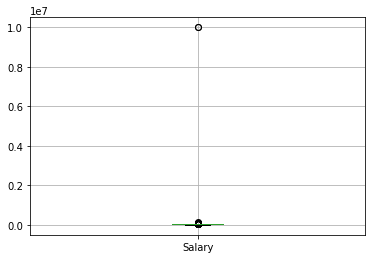

In [28]:
# Check the box plot for the Salary column
df['Salary'] = df['Salary'].astype(float)
df.boxplot(column='Salary')

As you can see, there is one or more than one very big value, which will have a impact on the overall pattern of the column. Therefore, we should delete it.

In [29]:
# Delete the very big value and record the information on the error list
ind = df[df['Salary'] > 2e6].index # The index of row with the very big value
# Record the information on the error list
for var in ind:
    errList['indexOfdf'].append(var)
    errList['Id'].append(df['Id'][var])
    errList['ColumnName'].append('Salary')
    errList['Modified'].append(np.nan)
    errList['Original'].append(df['Salary'][var])
    errList['ErrorType'].append('Outlier')
    errList['Fixing'].append('delete the row with the outlier')

# Delete the row with the outlier
df = df[df['Salary'] <= 2e6]

Let's turn back to our box plot

<AxesSubplot:>

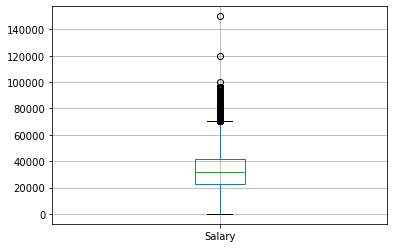

In [30]:
df.boxplot(column='Salary')

It looks better. For the rest of outlier, I'm not going to handle them because they are not extremely large and probably useful in some situations. I just record these outliers on the error list.

In [31]:
# Record these outliers on the error list

# Calculate the IQR of the column
IQR = df['Salary'].quantile(0.75) - df['Salary'].quantile(0.25)
# Due to the deletion of outlier, now the index of the dataframe is not equal to the number of row, so we traverse the index of it.
for var in df.index: 
    if (df['Salary'][var] < -1.5 * IQR) | (df['Salary'][var] > 1.5 * IQR):
        errList['indexOfdf'].append(var)
        errList['Id'].append(df['Id'][var])
        errList['ColumnName'].append('Salary')
        errList['Modified'].append(np.nan)
        errList['Original'].append(df['Salary'][var])
        errList['ErrorType'].append('Outlier')
        errList['Fixing'].append('don\'t handle it because it may be useful in some situations')

Finally, we need to convert the value to the value with two decimal places.

In [32]:
# Record the information on the error list
errList['indexOfdf'].append('ALL')
errList['Id'].append('ALL')
errList['ColumnName'].append('Salary')
errList['Modified'].append('ALL')
errList['Original'].append('ALL')
errList['ErrorType'].append('Irregularities')
errList['Fixing'].append('express all values to two dicimal places')
# Convert the value to the value with two decimal places.
dfCopy = df.copy() # To avoid SettingWithCopyWarning
dfCopy.loc[:,'Salary'] = df['Salary'].apply(lambda x: format(x, '.2f'))
df = dfCopy
df['Salary']

0        42500.00
1        34500.00
2        47500.00
3        21000.00
4        80000.00
           ...   
50698    59040.00
50699    40000.00
50700    18000.00
50701    25000.00
50702    50599.00
Name: Salary, Length: 50701, dtype: object

Let's move to the `OpenDate` column. The original format of the values in the column is not what and there is a extra 'T' among each value, so we need to delete the 'T' and convert the format to a datetime format.

Before converting the format, we need to check if there is any unreasonable value in the column. The reasonable value should meet the following rules:
* The year is between 1000 and 2022
* The month is 01, 02, ..., 12
* The day is 01, 02, ..., 30 if the month is 04, 06, 09 and 11
* The day is 01, 02, ..., 31 if the month is 01, 03, 05, 07, 08, 10, 12
* The day is 01, 02, ..., 29 if the month is 02
* The hour is 00, 01, ..., 23
* The minute is 00, 01, ..., 59
* The second is 00, 01, ..., 59

Let's do check this using regular expression and delete those that don't match the rules because they are obvious wrong values and not useful for further analysis. We don't handle the extra 'T' in this step.

In [33]:
# Using regular expression and delete those that don't match the rules

# Record the information on the error list
pattern = r'(1[0-9]{3}|20([01][0-9]|2[0-2]))((0[469]|11)([012][0-9]|30)|(0[13578]|1[02])([012][0-9]|3[01])|02[012][0-9])T([01][0-9]|2[0-3])([0-5][0-9]){2}'
for var in df.index:
    if re.fullmatch(pattern, df['OpenDate'][var]) == None:
        errList['indexOfdf'].append(var)
        errList['Id'].append(df['Id'][var])
        errList['ColumnName'].append('OpenDate')
        errList['Modified'].append(np.nan)
        errList['Original'].append(df['OpenDate'][var])
        errList['ErrorType'].append('Inconsistency')
        errList['Fixing'].append('delete it because because it is a obvious wrong value')
# Delete those that don't match the rules
df = df[df['OpenDate'].apply(lambda x: re.fullmatch(pattern, x)).notna()]

Then, convert their format to a datetime format.

In [34]:
# Record the information on the error list
errList['indexOfdf'].append('ALL')
errList['Id'].append('ALL')
errList['ColumnName'].append('OpenDate')
errList['Modified'].append('ALL')
errList['Original'].append('ALL')
errList['ErrorType'].append('Irregularities')
errList['Fixing'].append('convert them to proper datatime format')
# Convert the format to a datetime format
dfCopy = df.copy() # To avoid SettingWithCopyWarning
dfCopy.loc[:,'OpenDate'] = df['OpenDate'].apply(lambda x: datetime.strptime(x, '%Y%m%dT%H%M%S'))
df = dfCopy
df['OpenDate']

0       2013-01-23 15:00:00
1       2013-04-27 15:00:00
2       2012-07-09 15:00:00
3       2012-03-07 00:00:00
4       2012-12-29 00:00:00
                ...        
50698   2012-06-25 15:00:00
50699   2013-01-06 12:00:00
50700   2012-08-11 00:00:00
50701   2012-01-12 12:00:00
50702   2013-01-31 00:00:00
Name: OpenDate, Length: 50700, dtype: datetime64[ns]

The format of the column `CloseDate` is the same as `OpenDate`, so we are going to do the very similar operations on this column.

In [35]:
# Using regular expression and delete those that don't match the rules

# Record the information on the error list
pattern = r'(1[0-9]{3}|20([01][0-9]|2[0-2]))((0[469]|11)([012][0-9]|30)|(0[13578]|1[02])([012][0-9]|3[01])|02[012][0-9])T([01][0-9]|2[0-3])([0-5][0-9]){2}'
for var in df.index:
    if re.fullmatch(pattern, df['CloseDate'][var]) == None:
        errList['indexOfdf'].append(var)
        errList['Id'].append(df['Id'][var])
        errList['ColumnName'].append('CloseDate')
        errList['Modified'].append(np.nan)
        errList['Original'].append(df['CloseDate'][var])
        errList['ErrorType'].append('Inconsistency')
        errList['Fixing'].append('delete it because because it is a obvious wrong value')
# Delete those that don't match the rules
df = df[df['CloseDate'].apply(lambda x: re.fullmatch(pattern, x)).notna()]

Then, convert their format to a datetime format.

In [36]:
# Record the information on the error list
errList['indexOfdf'].append('ALL')
errList['Id'].append('ALL')
errList['ColumnName'].append('CloseDate')
errList['Modified'].append('ALL')
errList['Original'].append('ALL')
errList['ErrorType'].append('Irregularities')
errList['Fixing'].append('convert them to proper datatime format')
# Convert the format to a datetime format
dfCopy = df.copy() # To avoid SettingWithCopyWarning
dfCopy.loc[:,'CloseDate'] = df['CloseDate'].apply(lambda x: datetime.strptime(x, '%Y%m%dT%H%M%S'))
df = dfCopy
df['CloseDate']

0       2013-04-23 15:00:00
1       2013-07-26 15:00:00
2       2012-08-08 15:00:00
3       2012-06-05 00:00:00
4       2013-01-28 00:00:00
                ...        
50698   2012-07-25 15:00:00
50699   2013-01-20 12:00:00
50700   2012-10-10 00:00:00
50701   2012-03-12 12:00:00
50702   2013-02-14 00:00:00
Name: CloseDate, Length: 50700, dtype: datetime64[ns]

`SourceName` is the last column of the dataframe. Let's first check what values it has.

In [37]:
# Check what values it has
for var in df.groupby(['SourceName']).size().sort_values(ascending=False).index:
    print(var)

totaljobs.com
cv-library.co.uk
cwjobs.co.uk
jobsite.co.uk
staffnurse.com
caterer.com
Jobcentre Plus
careworx.co.uk
jobserve.com
jobs.guardian.co.uk
jobs.catererandhotelkeeper.com
MyUkJobs
fish4.co.uk
theitjobboard.co.uk
rengineeringjobs.com
planetrecruit.com
salestarget.co.uk
gojobsearch.co.uk
GAAPweb
technojobs.co.uk
ukstaffsearch.com
Brand Republic Jobs
justengineers.net
hays.co.uk
strike-jobs.co.uk
eFinancialCareers
britishjobsonthe.net
cvbrowser.com
cityjobs.com
careerbuilder.com
jobs.newstatesman.com
jobg8.com
emedcareers.com
jobs.opticianonline.net
jobs4medical.co.uk
jobsineducation.co.uk
london4jobs.co.uk
londonjobs.co.uk
nijobs.com
PR Week Jobs
insurancejobs.co.uk
thecareerengineer.com
jobsinrisk.com
accountancyagejobs.com
nijobfinder.co.uk
contractjobs.com
tntjobs.co.uk
jobs.bighospitality.co.uk
icaewjobs.com
jobs.telegraph.co.uk
onlymarketingjobs.com
Multilingualvacancies
jobstoday.co.uk
myjobs.cimaglobal.com
energygenerationjobs.com
jobs.electronicsweekly.com
Jobs Ac
jobsins

It looks like there is no error in these website address. We don't need handle them. All done!

## Saving data
Finally, we should output the clean dataset and the error list.

In [38]:
# Output the clean dataset and the error list
errDataFrame = pd.DataFrame(errList)
errDataFrame.to_csv('S3749857_errorlist.csv')
df.to_csv('S3749857_dataset1_solution.csv', index = False)

## Summary
The dataset have a lot of minor mistakes which need to be patient to handle.